In [331]:
import os
import glob
import re
import pandas
import pandas as pd
import csv
import pandas as pd
import jieba
import jieba.posseg as pseg

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim#For topic modeling
import numpy as np #for arrays
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer
import scipy

In [68]:
os.chdir("C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data")

In [69]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [70]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data/data_combined.csv", index=False)

In [71]:
data = pd.read_csv('C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data/data_combined.csv')
data.shape

(22031, 10)

In [72]:
data

,Posts,User Names,User Links,Likes,Reblogs,Comments,Comment Links,Post Date,Post Time,Date in Datetime Format
0,:女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...,小黑爱小白,https://weibo.cn/ryxh784533,0,0,0,https://weibo.cn/comment/1EgWd?uid=1261131600&...,2010-01-01,22:44:38,2010-01-01
1,:《恋爱前规则》这部电影拍得一点也不像原著《和空姐同居的日子》那么精彩，这些网络小说改编成电...,肉包儿和猪猪的纪念,https://weibo.cn/comex,0,0,0,https://weibo.cn/comment/1EeGI?uid=1403893343&...,2010-01-01,22:18:39,2010-01-01
2,:不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...,小壹,https://weibo.cn/u/1657282170,0,0,2,https://weibo.cn/comment/1Edu3?uid=1657282170&...,2010-01-01,22:04:23,2010-01-01
3,:看了恋爱前规则，对小说产生了兴趣，《和空姐同居的日子》找出来看，刚刚看完，无限yy,成熟孩子气,https://weibo.cn/lcj0431046,0,0,0,https://weibo.cn/comment/1EbVw?uid=1644651464&...,2010-01-01,21:45:27,2010-01-01
4,:@claireg 同居也是一种选择。,阿力克狮,https://weibo.cn/amour,0,0,0,https://weibo.cn/comment/1EaV7?uid=1113519487&...,2010-01-01,21:33:31,2010-01-01
5,:@thales 提倡合法同居。,阿力克狮,https://weibo.cn/amour,0,0,0,https://weibo.cn/comment/1EaJ4?uid=1113519487&...,2010-01-01,21:30:53,2010-01-01
6,:@thales 你就忍心人家下半辈子活在坟墓之中？撕掉本本，还可以同居嘛。,阿力克狮,https://weibo.cn/amour,0,0,0,https://weibo.cn/comment/1Ear6?uid=1113519487&...,2010-01-01,21:26:55,2010-01-01
7,:(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...,i幸福i晓林,https://weibo.cn/chinalunyu,0,0,0,https://weibo.cn/comment/1DLOh?uid=1656366057&...,2010-01-01,14:27:57,2010-01-01
8,:只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...,Z新新Z,https://weibo.cn/xinn,0,0,0,https://weibo.cn/comment/1Fuc0?uid=1662219833&...,2010-01-02,23:57:34,2010-01-02
9,:《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...,橘子Dan,https://weibo.cn/zygqd,0,0,2,https://weibo.cn/comment/1FgGP?uid=1410984651&...,2010-01-02,21:14:48,2010-01-02


In [269]:
#文本清理Text Cleaning
#单独记录出现的书籍电影或者电视剧，以及hashtags
#Separately record movies/books/ TV shows, as well as hashtags
posts = data['Posts']
posts_clean = []
movies = []
hashtags = []

for post in posts:
    #http, @, \n
    post = re.sub(r'http.+', '', post)
    post = re.sub(r'\@.+','', post)
    post = re.sub(r'\n', '', post)
    
    #In Chinese 《》 is used for book, TV or movie names
    movie = re.findall(r'《\w+》',post)
    post = re.sub(r'《\w+》', '', post)
    movies.append(movie)
    
    #In Chinese, double hashtags are used instead of one
    #有一些连续好几个#的比较烦
    #some posts have multiple hashtags which are annoying
    hashtag = re.findall(r'#(.*?)#',post)
    post = re.sub(r'#(.*?)#', '', post)
    hashtags.append(hashtag)
    
    posts_clean.append(post)

In [270]:
#检查一下 Double check
print(len(posts))
print(len(posts_clean))
print(len(movies))
print(len(hashtags))

22031
22031
22031
22031


In [271]:
#有一些使用单#的,并没有多少，我们忽略掉
#some posts use singel hashtags but not a lot，just ignore them

number_of_single_hashtags = 0
for post in posts_clean:
    if '#' in post:
        number_of_single_hashtags += 1
        
number_of_single_hashtags

45

In [272]:
movies[-5:]

[['《流淌的美好时光》', '《流淌的美好时光》'], [], [], ['《超时空同居》'], []]

In [273]:
hashtags[-5:]

[[],
 ['警察[超话]', '最美基层民警', '北京[超话]'],
 ['北京[超话]', '北京[超话]', '最美基层民警', '北京[超话]'],
 [],
 []]

In [274]:
#有一些hashtag里面有[]可以考虑把内容拉出来，不过暂时不动
for hashtag in hashtags:
    for tag in hashtag:
        if '[' in tag:
            print(tag)

因为遇见你[音乐]
青春之旅 真人版[电影]
Popular Song (Feat. MIKA)[音乐]
狼少女与黑王子[电影]
爵迹[电影]
一句顶一万句[电影]
和空姐分居的日子（和空姐同居的日子续）-文猪[图书]
동거 (同居)[音乐]
到不了-陈翔[音乐]
临时同居[电影]
女主角失格[电影]
破分手传闻】杜海涛沈梦辰恋情曝光后，屡传分手，更有传女方出轨。今日，某星探曝光两人同居视频，沈梦辰现身杜海涛家中。[心]
美国队长3[电影]
从你的全世界路过-张嘉佳[图书]
陪安东尼度过漫长岁月[电影]
荒唐-疯子三三[图书]
我们大家的河合庄[电影]
从此以后（电影主题曲）[音乐]
海洋之歌-西瓜_JUN[音乐]
一个人-韩若彤[音乐]
追凶者也[电影]
和自己旅行[音乐]
My Own Life-周笔畅[音乐]
逗鸟外传：萌宝满天飞[电影]
大话西游3[电影]
你在终点等我[音乐]
爱两只不同居居的王琳和马婉悦[超话]
Awaken-F[超话]
彩蛇[超话]
杨超越[超话]
杨超越[超话]
尹均相[超话]
金裕贞[超话]
李泽言[超话]
贺顶红[超话]
林彦俊[超话]
二次元[超话]
jonyj[超话]
oner[超话]
漠尚[超话]
幕后之王[超话]
罗晋[超话]
mrshiddleston[超话]
漠尚[超话]
合法同居[超话]
与紫成说[超话]
博君一肖[超话]
权瞳[超话]
胖次鱼资源基地[超话]
轰爆[超话]
明日之后[超话]
阎王不高兴[超话]
陳家樂Carlos[超话]
丁醇少女101[超话]
明日之后[超话]
夫夫同居日常[超话]
小说推荐[超话]
夫夫同居日常[超话]
明日之后[超话]
圣经经文[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
佐仓绫音[超话]
坛虾[超话]
泰剧与爱同居[超话]
灿白[超话]
灿白文[超话]
灿白文推荐[超话]
贺顶红[超话]
迪婷[超话]
许魏洲[超话]
泰剧与爱同居[超话]
王者荣耀九天狐[超话]
小说漫画推荐[超话]
情感[超话]
泰剧与爱同居[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
许魏洲[超话]
九瓶[超话]
泰剧与爱同居[超话]
泰剧与爱同居[超话]
泰剧与爱同居[超话]
泰剧与爱同居[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
两个小姐姐

In [279]:
#结巴中文分词
#segmentation using jieba

def chinese_word_cut(text):
    return " ".join(jieba.cut(text))

data['Clean Posts'] = posts_clean
data['Cutted Posts'] = data['Clean Posts'].apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\65697\AppData\Local\Temp\jieba.cache
Loading model cost 1.068 seconds.
Prefix dict has been built succesfully.


In [287]:
data['Cutted_Posts'] = data.pop('Cutted Posts')

In [288]:
data.Cutted_Posts[:5]

0    : 女人 失恋 以后 ， 听到 大家 都 普遍 反映 前男友 新 找 的 那个 姑娘 没 自...
1    : 这部 电影 拍 得 一点 也 不 像 原著 那么 精彩 ， 这些 网络小说 改编 成 电...
2    : 不论 东西 多少 ， 只要 是 搬家 都 是 大 工程 啊 。 我 跟 同居 者 聊天 ...
3    : 看 了 恋爱 前 规则 ， 对 小说 产生 了 兴趣 ， 找出 来看 ， 刚刚 看 完 ...
4                                                    :
Name: Cutted_Posts, dtype: object

In [296]:
max_df = 0.8
min_df = 3
vecttfidf = TfidfVectorizer(max_df = max_df, 
                       min_df = min_df, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b')
term_matrix_tf = pd.DataFrame(vecttfidf.fit_transform(data.Cutted_Posts).toarray(), columns=vecttfidf.get_feature_names())
term_matrix_tf.head()

,__,aa,aa制,ab,abo,ac,acfun,adele,akb48,alex,...,鼻涕,鼻血,鼾声,齐心协力,齐齐哈尔,龙卷风,龙哥,龙年,龙虾,龙门
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [318]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


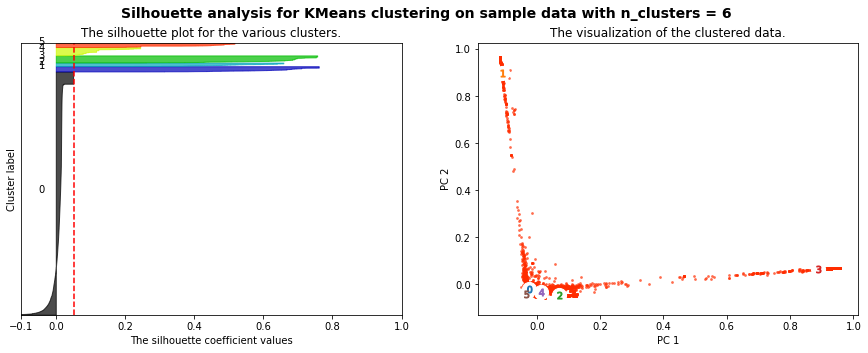

For n_clusters = 6, The average silhouette_score is : 0.053


In [320]:
X = term_matrix_tf
plotSilhouette(6, X)

In [325]:
#lets just do 10 categoris
#分十类试一试

km = sklearn.cluster.KMeans(n_clusters=10, init='k-means++')
km.fit(term_matrix_tf)
data['kmeans_predictions'] = km.labels_
data

,Posts,User Names,User Links,Likes,Reblogs,Comments,Comment Links,Post Date,Post Time,Date in Datetime Format,Clean Posts,Cutted_Posts,kmeans_predictions
0,:女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...,小黑爱小白,https://weibo.cn/ryxh784533,0,0,0,https://weibo.cn/comment/1EgWd?uid=1261131600&...,2010-01-01,22:44:38,2010-01-01,:女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...,: 女人 失恋 以后 ， 听到 大家 都 普遍 反映 前男友 新 找 的 那个 姑娘 没 自...,1
1,:《恋爱前规则》这部电影拍得一点也不像原著《和空姐同居的日子》那么精彩，这些网络小说改编成电...,肉包儿和猪猪的纪念,https://weibo.cn/comex,0,0,0,https://weibo.cn/comment/1EeGI?uid=1403893343&...,2010-01-01,22:18:39,2010-01-01,:这部电影拍得一点也不像原著那么精彩，这些网络小说改编成电影后真的大打折扣。也是一样。,: 这部 电影 拍 得 一点 也 不 像 原著 那么 精彩 ， 这些 网络小说 改编 成 电...,1
2,:不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...,小壹,https://weibo.cn/u/1657282170,0,0,2,https://weibo.cn/comment/1Edu3?uid=1657282170&...,2010-01-01,22:04:23,2010-01-01,:不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...,: 不论 东西 多少 ， 只要 是 搬家 都 是 大 工程 啊 。 我 跟 同居 者 聊天 ...,1
3,:看了恋爱前规则，对小说产生了兴趣，《和空姐同居的日子》找出来看，刚刚看完，无限yy,成熟孩子气,https://weibo.cn/lcj0431046,0,0,0,https://weibo.cn/comment/1EbVw?uid=1644651464&...,2010-01-01,21:45:27,2010-01-01,:看了恋爱前规则，对小说产生了兴趣，找出来看，刚刚看完，无限yy,: 看 了 恋爱 前 规则 ， 对 小说 产生 了 兴趣 ， 找出 来看 ， 刚刚 看 完 ...,1
4,:@claireg 同居也是一种选择。,阿力克狮,https://weibo.cn/amour,0,0,0,https://weibo.cn/comment/1EaV7?uid=1113519487&...,2010-01-01,21:33:31,2010-01-01,:,:,1
5,:@thales 提倡合法同居。,阿力克狮,https://weibo.cn/amour,0,0,0,https://weibo.cn/comment/1EaJ4?uid=1113519487&...,2010-01-01,21:30:53,2010-01-01,:,:,1
6,:@thales 你就忍心人家下半辈子活在坟墓之中？撕掉本本，还可以同居嘛。,阿力克狮,https://weibo.cn/amour,0,0,0,https://weibo.cn/comment/1Ear6?uid=1113519487&...,2010-01-01,21:26:55,2010-01-01,:,:,1
7,:(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...,i幸福i晓林,https://weibo.cn/chinalunyu,0,0,0,https://weibo.cn/comment/1DLOh?uid=1656366057&...,2010-01-01,14:27:57,2010-01-01,:(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...,: ( 1 / 2 ) 知道 周迅 的 越来越 多 ， 知道 鲁迅 的 越来越少 ； 知道 ...,2
8,:只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...,Z新新Z,https://weibo.cn/xinn,0,0,0,https://weibo.cn/comment/1Fuc0?uid=1662219833&...,2010-01-02,23:57:34,2010-01-02,:只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...,: 只有 一个 星期 ， 原本 不 认识 的 人 就 确定 恋爱 关系 并 同居 ， 不 知...,1
9,:《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...,橘子Dan,https://weibo.cn/zygqd,0,0,2,https://weibo.cn/comment/1FgGP?uid=1410984651&...,2010-01-02,21:14:48,2010-01-02,:——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同居了呀？...,: — — 有个 地方 不解 的 是 ， 海藻 和 宋思明 发生 关系 难道 是 海藻 的 ...,1


In [326]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value)) 
  
CountFrequency(data['kmeans_predictions']) 

 1 :  17490
 2 :  426
 8 :  364
 9 :  626
 7 :  1476
 3 :  572
 0 :  314
 4 :  393
 6 :  86
 5 :  284


In [307]:
terms = vecttfidf.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 就是
 便是
 路上
 风景
 升值
 劳工
 难人
 升职
 誓言
 渔网


Cluster 1:
 越来越少
 越来越
 婚后
 未婚同居
 耍手艺
 耍手腕
 二奶
 奶奶
 出书
 读书


Cluster 2:
 一样
 结婚
 动物
 大人
 有钱
 夫人
 情人
 女人
 男人
 小孩


Cluster 3:
 生活
 我们
 一个
 结婚
 一起
 日子
 什么
 自己
 开始
 喜欢




In [332]:
#Wald
#I skipped the sparse matrix last question, so this is the sparse matrix
#I don't know how to set diagno to 0 in dataframe, so have to use sparse matrix
termtfidf = vecttfidf.fit_transform(data.Cutted_Posts)
termCoocMat = termtfidf * termtfidf.T
termCoocMat.setdiag(0)
selectIndices = []
indexToCat = []
for c in set(a):
    selectIndices += list(data[data['kmeans_predictions'] == c].index)[:50]
    indexToCat += [c] * 50
    #.groupby('category').sum()
subCoocMat = termCoocMat[selectIndices,:][:,selectIndices]
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

C:\Users\65697\Anaconda3\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
C:\Users\65697\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\65697\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


ValueError: The number of observations cannot be determined on an empty distance matrix.